In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
url = "https://competitioncorner.net/api2/v1/leaderboard/9122/tab/team_55822?start=0&end=50"
response = requests.get(url)
data = response.json()
athletes = data['athletes']

In [70]:
# Extract athlete data
athlete_data = []
for athlete in athletes:
    athlete_info = {
        'Name': athlete['name'],
        'Affiliate': athlete['affiliate'],
        'Place': athlete['place'],
        'Total Points': int(athlete['totalPoints'])
    }

    workout_scores = athlete['workoutScores']
    cumulative_points = 0
    workout_points = []
    workout_counter = 1  # Initialize workout counter
    for workout_id in workout_scores:
        workout_score = workout_scores[workout_id]
        cumulative_points += int(workout_score['points'])
        
        workout_data = {
            f'Workout {workout_counter} Rank': workout_score['rank'],
            f'Workout {workout_counter} Points': cumulative_points,
            f'Workout {workout_counter} Result': workout_score['res']
        }
        athlete_info.update(workout_data)
        
        workout_counter += 1  # Increase workout counter
    
    athlete_data.append(athlete_info)


In [71]:
# Create a DataFrame
df = pd.DataFrame(athlete_data)

In [72]:
# Calculate ranks after each workout
workout_ranks = []
workout_columns = ['Workout 1 Points', 'Workout 2 Points', 'Workout 3 Points', 'Workout 4 Points']
for workout in workout_columns:
    df[workout + ' Rank'] = df[workout].rank(method='min', ascending=False).astype(int)

In [73]:
# Select top 10 athletes
top_10_df = df.head(10)
top_10_df

,Name,Affiliate,Place,Total Points,Workout 1 Rank,Workout 1 Points,Workout 1 Result,Workout 2 Rank,Workout 2 Points,Workout 2 Result,Workout 3 Rank,Workout 3 Points,Workout 3 Result,Workout 4 Rank,Workout 4 Points,Workout 4 Result,Workout 1 Points Rank,Workout 2 Points Rank,Workout 3 Points Rank,Workout 4 Points Rank
0,Allez les Machines,CROSSFIT SION,1,347,15,57,75,2,152,309,2,247,06:29,1,347,166,15,4,2,1
1,CFU,CROSSFIT UNIFY,2,324,9,69,78,5,149,300,5,229,06:54,2,324,150,9,5,3,2
2,Like Mother Like Son,CROSSFIT INFECTED,3,323,1,100,85,4,185,303,8,256,07:33,10,323,140,1,1,1,3
3,Eiffel Power,CROSSFIT BUA,4,297,5,80,81,22,124,246,1,224,06:20,7,297,143,5,13,4,4
4,The Fontpies,CROSSFIT INFECTED,5,287,7,73,79,1,173,317,23,216,CAP +92,8,287,141,7,2,6,5
5,Team Icon,INDEPENDENT,6,285,21,45,74,3,135,305,11,200,07:56,4,285,149,21,9,10,6
6,A Jerk and A Snatch,CROSSFIT INFECTED,7,279,1,100,85,11,165,260,16,220,CAP +134,14,279,131,1,3,5,7
7,Guns and hun,CROSSFIT THURLES,8,274,3,90,84,34,122,218,4,207,06:42,10,274,140,3,16,7,8
8,Neil Johnston,CROSSFIT BROUGHSHANE,9,268,13,61,77,11,126,260,20,173,CAP +123,2,268,150,13,12,16,9
9,Fitness factory 2,INDEPENDENT,10,262,25,41,72,16,96,254,2,191,06:29,8,262,141,25,23,13,10


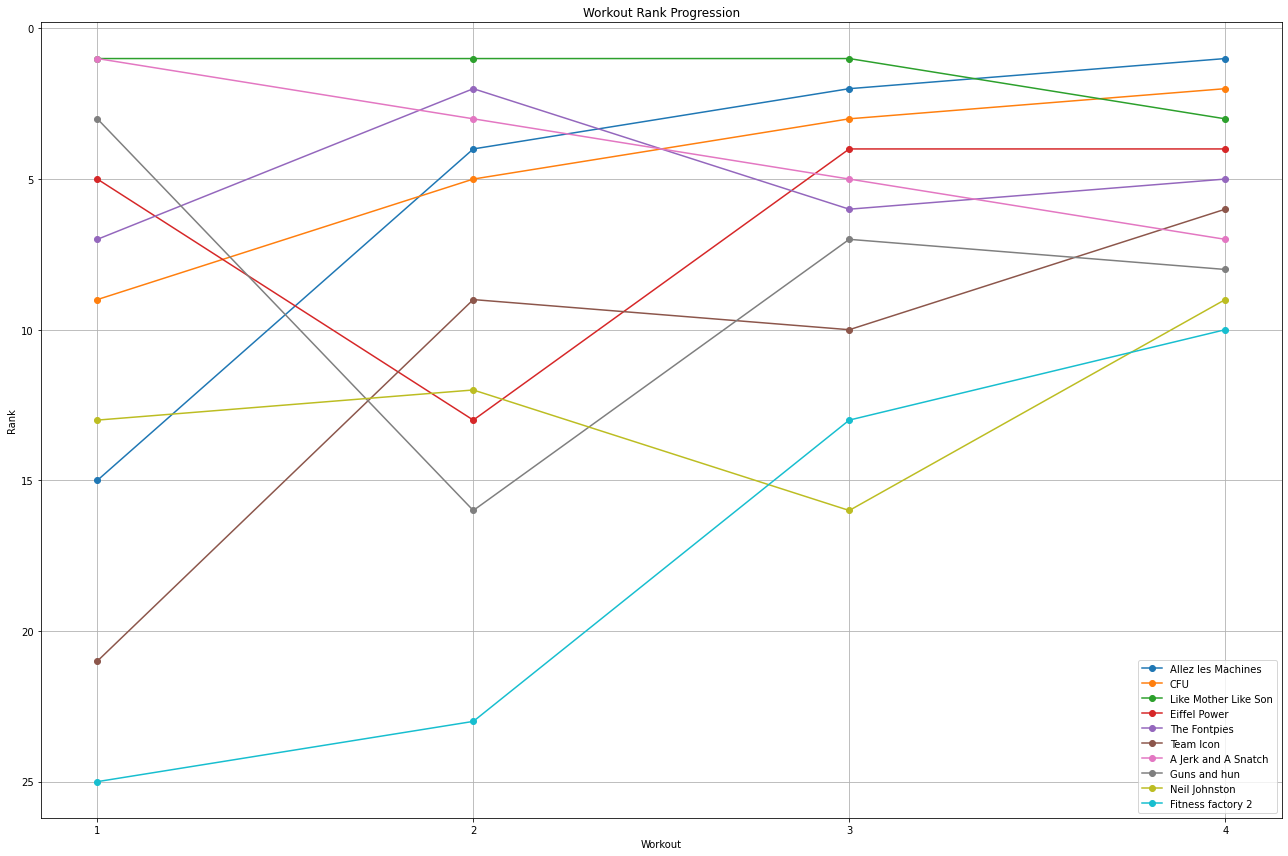

In [76]:
# Workout columns
workout_columns = ['Workout 1 Points Rank', 'Workout 2 Points Rank', 'Workout 3 Points Rank', 'Workout 4 Points Rank']

# Plotting
plt.figure(figsize=(18, 12))
for idx, row in top_10_df.iterrows():
    plt.plot(range(1, len(workout_columns) + 1), row[workout_columns], label=row['Name'], marker='o')

plt.xlabel('Workout')
plt.ylabel('Rank')
plt.title('Workout Rank Progression')
plt.gca().invert_yaxis()  # Invert y-axis
plt.xticks(range(1, len(workout_columns) + 1))  # Set x-axis ticks to integers
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()